# <span style="color:#0047AB;">OASIS INFOBYTE DATASCIENCE INTERN</span>

## <span style="color:#FF0000;">Task-1: IRIS FLOWER CLASSIFICATION</span>

**Name:** Miraj Deep Bhandari

## <span style="color:#00A300;">Problem Description</span>

I have a dataset containing measurements of iris flowers, including sepal length, sepal width, petal length, and petal width. These measurements come from three different species of iris flowers: setosa, versicolor, and virginica. Each species has its unique characteristics based on these measurements.

## <span style="color:#AA00FF;">Objective</span>

My goal is to create a machine learning model that can analyze these measurements and accurately classify iris flowers into one of the three species (setosa, versicolor, or virginica). I want the model to learn patterns and relationships within the data so that it can predict the species of new, unseen iris flowers correctly.

![iris.png](https://miro.medium.com/v2/resize:fit:1400/1*ZK9_HrpP_lhSzTq9xVJUQw.png)


## <span style="color:#FF5733;">Importing the Dependencies</span>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

## <span style="color:#FF5733;">Reading the CSV File</span>

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## <span style="color:#FF5733;">Inspecting the Data Types of the Features</span>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


 ## <span style="color:#FF5733;">Inspecting  descriptive statistics of Numerical Columns</span>


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## <span style="color:#FF5733;">Checking for Null Values and Duplicate Data</span>

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.duplicated().sum()

0

## <span style="color:#FF5733;">Feature Selection</span>

In [9]:
df.drop("Id",axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## <span style="color:#FF5733;">Exploratory Data Analysis (EDA)</span>

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


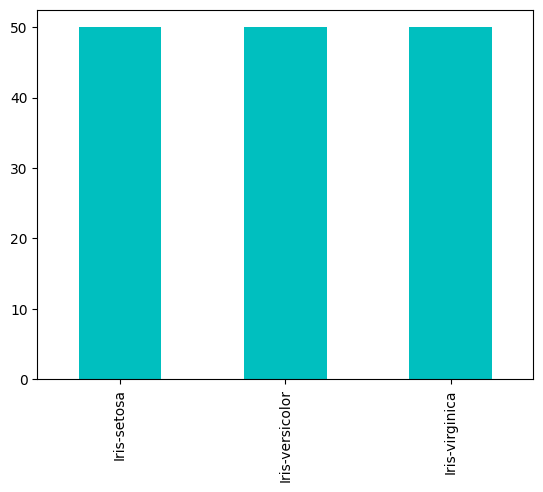

In [10]:
print(df['Species'].value_counts())
df['Species'].value_counts().plot(kind="bar",color='c')
plt.show()

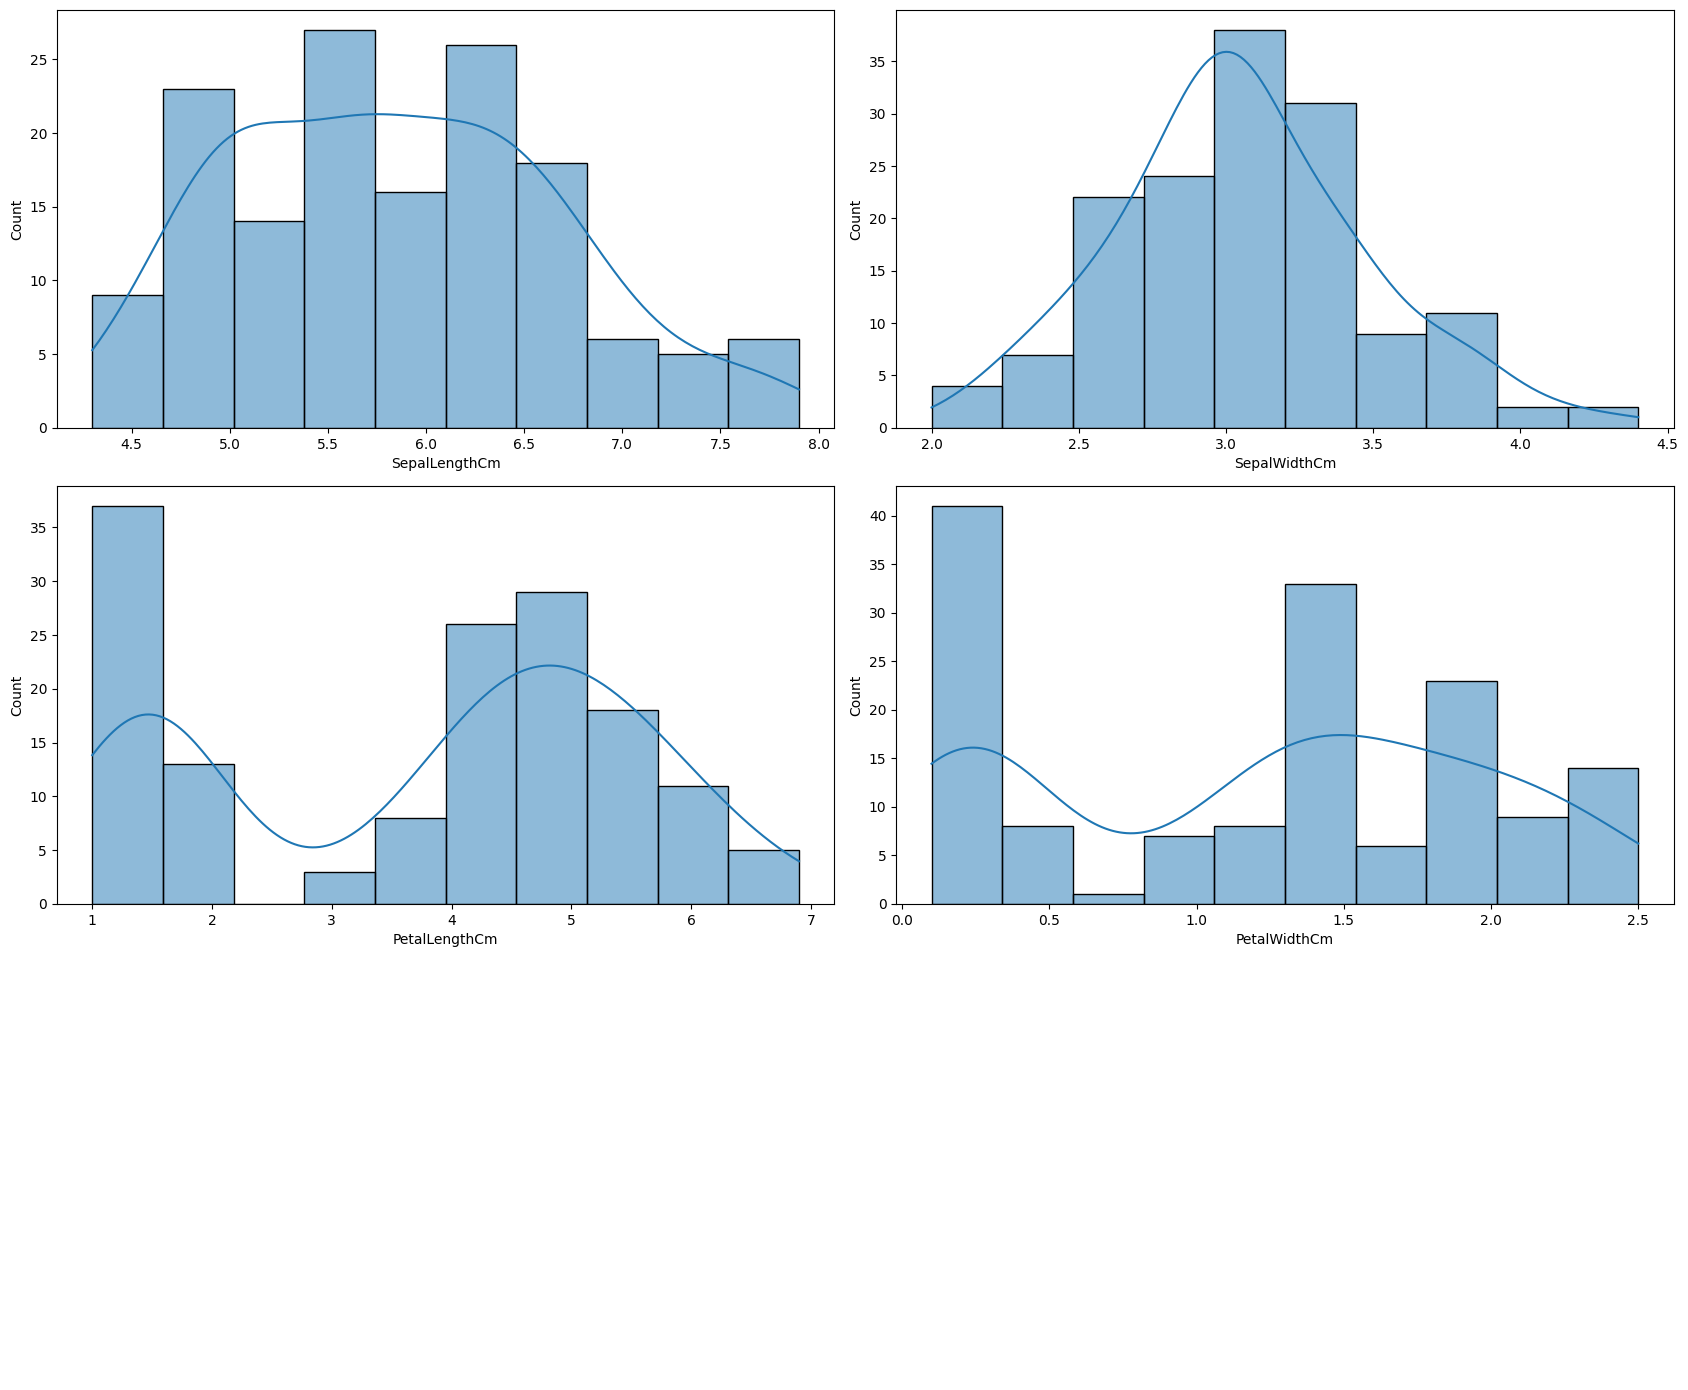

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(17, 14))  # Adjust the figsize as needed
ax = ax.flatten()

# features = df.columns
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for i, column in enumerate(features):
    sns.histplot(data=df, x=column, kde=True, ax=ax[i],bins=10)
ax[4].axis('off')
ax[5].axis('off')
plt.tight_layout()# This helps in avoiding overlap of subplots
plt.show()


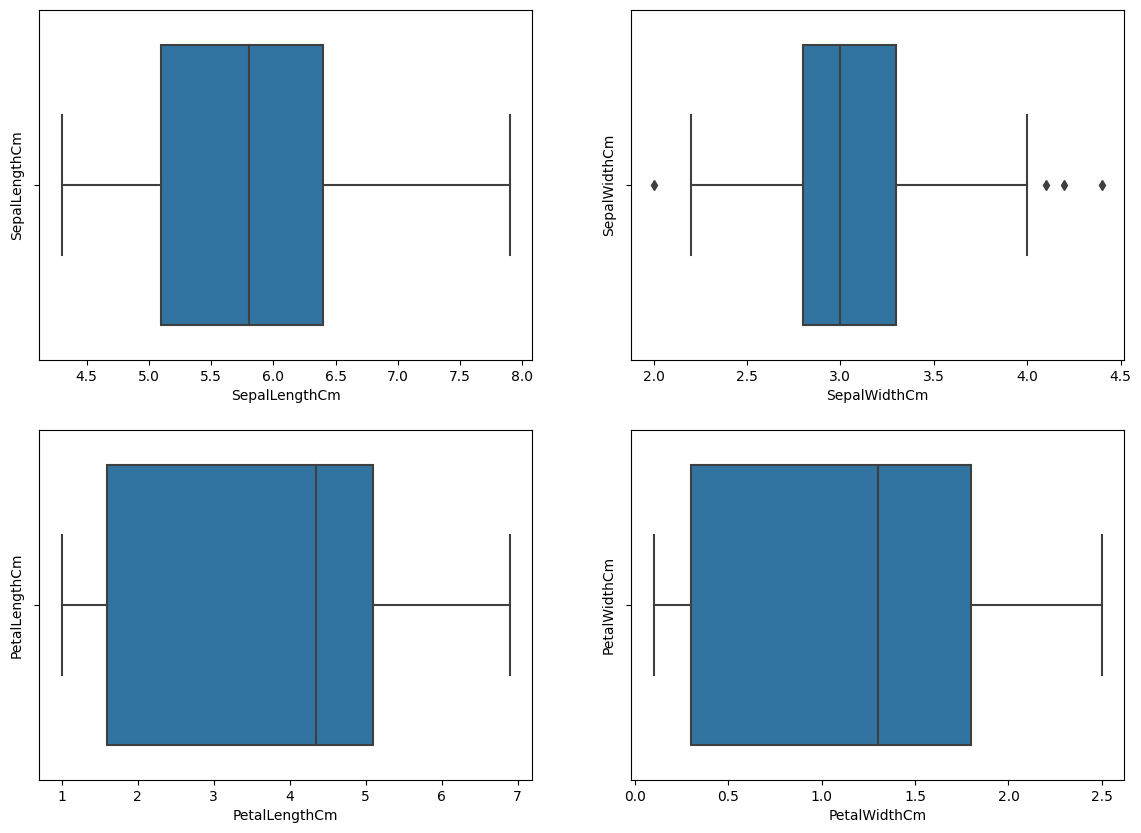

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))  # Adjust the figsize as needed
ax = ax.flatten()

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i, column in enumerate(features):
    sns.boxplot(data=df, x=column, ax=ax[i])
    ax[i].set_ylabel(column)  # Set the y-axis label to the feature name

# plt.tight_layout()
plt.show()


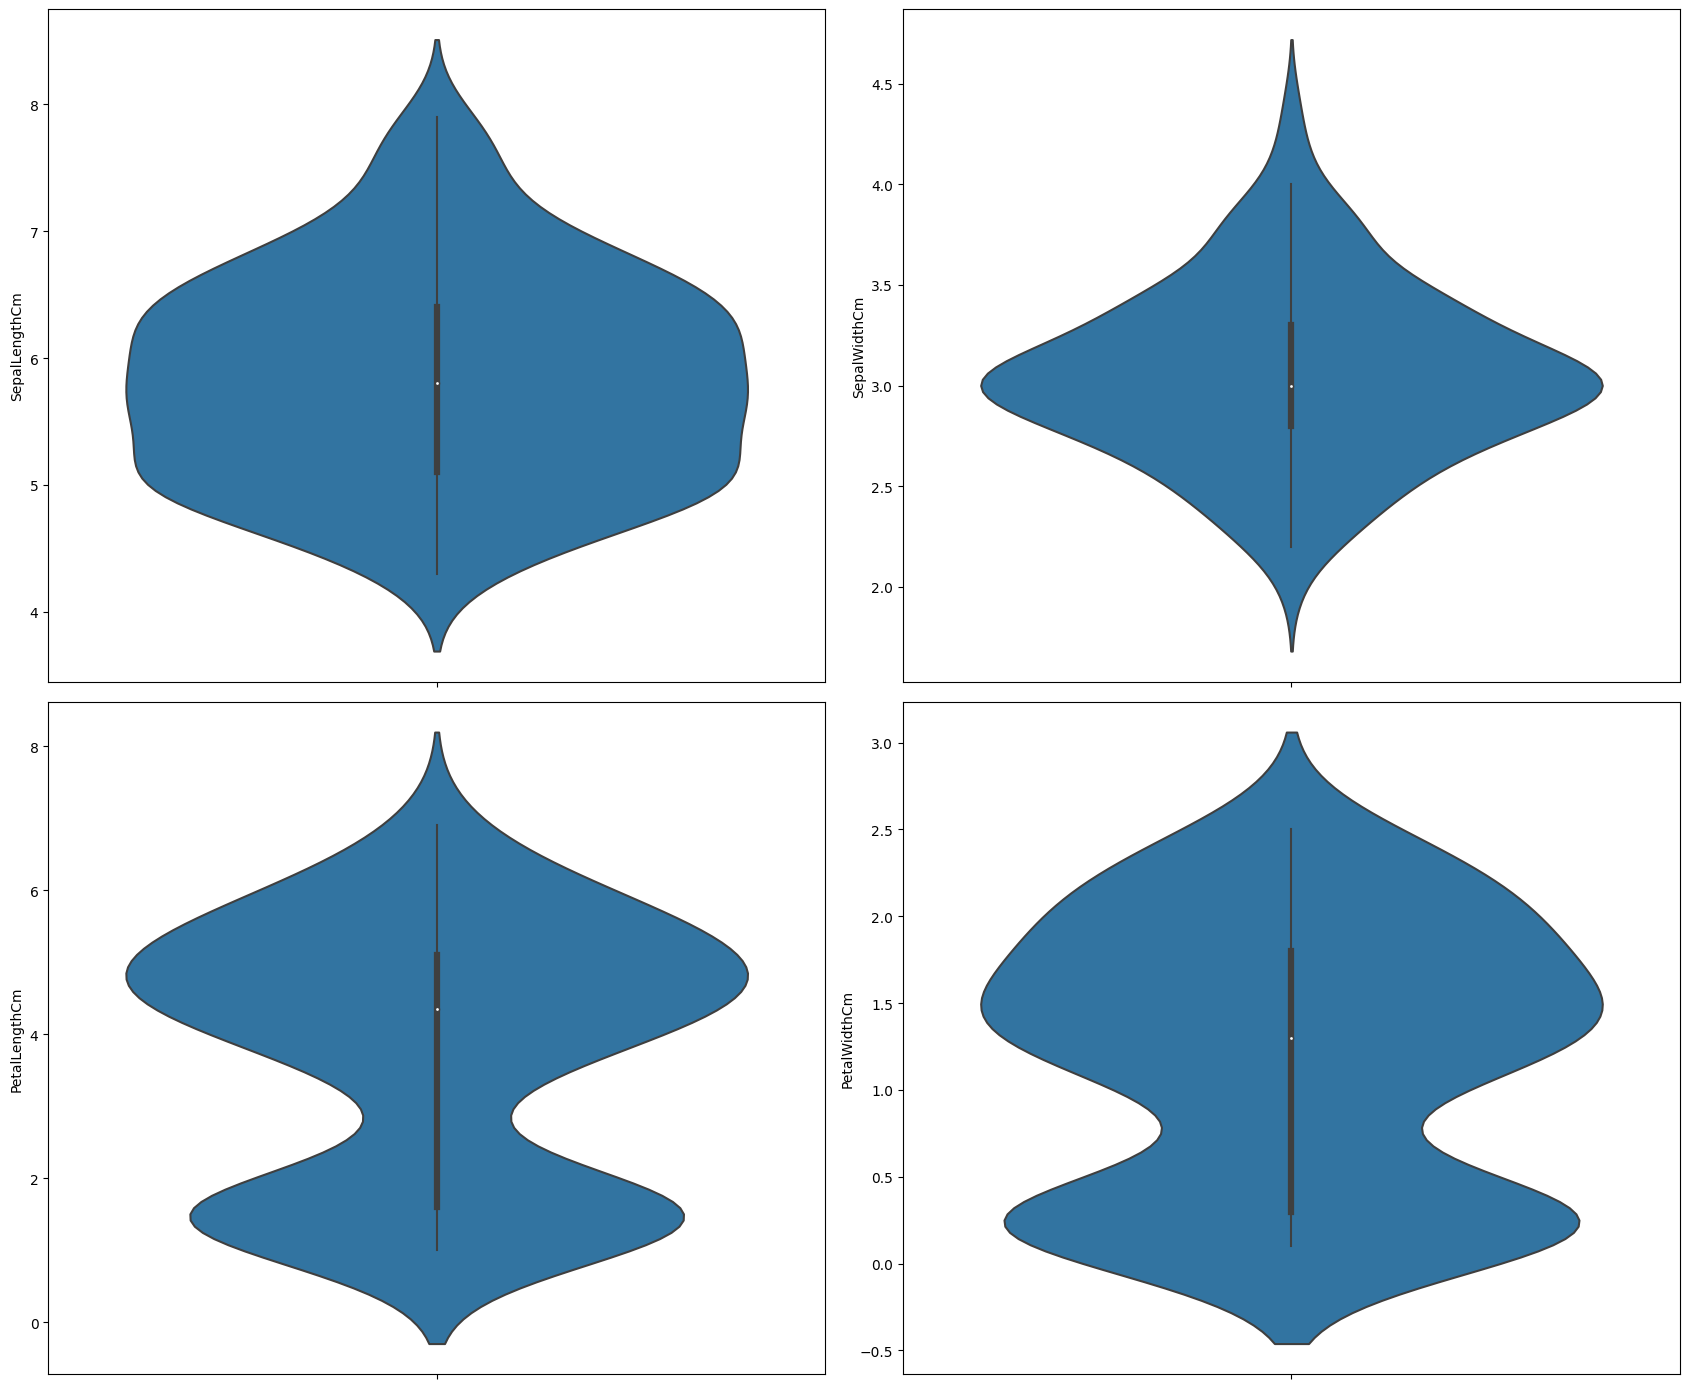

In [13]:

fig, ax = plt.subplots(2, 2, figsize=(17, 14))  # Adjust the figsize as needed
ax = ax.flatten()

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i, column in enumerate(features):
    sns.violinplot(data=df, y=column, ax=ax[i])
    ax[i].set_ylabel(column)  # Set the y-axis label to the feature name

plt.tight_layout()
plt.show()


In [14]:
print(df['Species'].unique())


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## <span style="color:#FF5733;">Feature Engineering </span>

In [15]:
encoding={
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

df['Species'].replace(encoding,inplace=True)

In [16]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
127,6.1,3.0,4.9,1.8,2
79,5.7,2.6,3.5,1.0,1
68,6.2,2.2,4.5,1.5,1
31,5.4,3.4,1.5,0.4,0
53,5.5,2.3,4.0,1.3,1


In [17]:
df_copy=df.copy()

## <span style="color:#FF5733;">Dividing the Dependent and Independent Variables</span>

In [18]:
y=df['Species']
x=df.drop(columns='Species')

In [19]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [20]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## <span style="color:#FF5733;">Feeding the Dependent and Independent Features into the Model</span>


In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Initialize the logistic regression model
logistic_regression = LogisticRegression()

# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


## <span style="color:#FF5733;">Observing the Model Performance</span>


In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(conf_matrix)
print(classification_rep)

[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



## <span style="color:#FF5733;">Confusion Matrix</span>

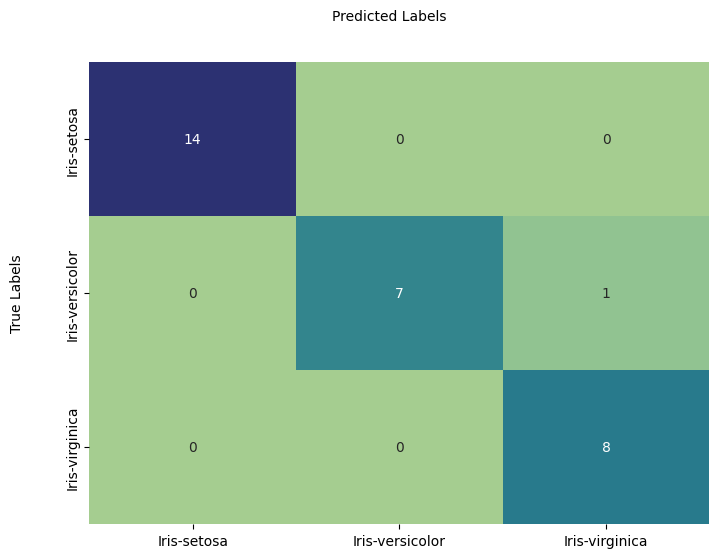

In [23]:
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
# Make predictions using the model

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='crest', cbar=False,
            xticklabels=class_names, yticklabels=class_names)


plt.figtext(0.5, 0.95, 'Predicted Labels', ha='center')

plt.ylabel('True Labels',labelpad=30)

plt.show()

## <span style="color:#FF5733;">Assessing the Model's Cross Validation Score</span>

In [24]:

# Initialize the logistic regression model with an increased max_iter
logistic_regression = LogisticRegression(max_iter=1000)  


k = 10
cross_val_scores = cross_val_score(logistic_regression, x, y, cv=k)

print("Mean accuracy:", cross_val_scores.mean())


Mean accuracy: 0.9733333333333334


# <span >...............................Thank You !! .........................</span>
